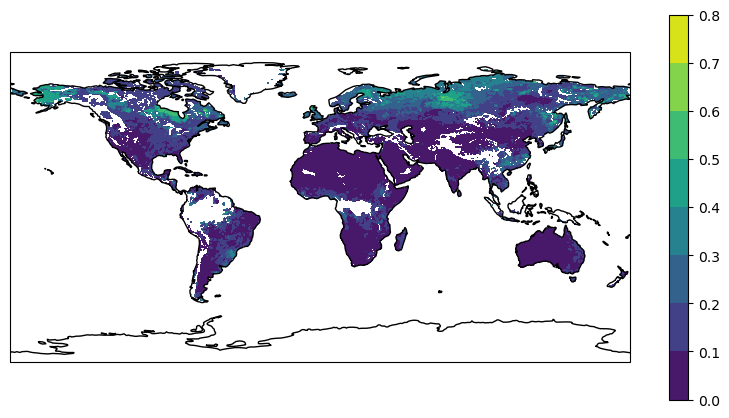

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

# Open the netCDF file
# ds = xr.open_dataset('/gpfsm/dnb34/amfox/GEOSldas_diagnostics/Jupyter/Matlab_functions/test_2D_write_v4.nc', decode_times=False)
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/OLv7_M36_ascat/OLv7_M36_ascat/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_db/M36_zscore_stats_2015_doy91_2021_doy90_W_75d_Nmin_5_spALL_all_pentads.nc4', decode_times=False)

# Extract the m_min, lon, and lat variables
m_min = ds['m_min'].transpose('lat', 'lon')

# Replace all occurrences of -9999. with np.nan
m_min = np.where(m_min == -9999., np.nan, m_min)

lon = ds['lon']
lat = ds['lat']

# Create a map with PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the m_min data as a color mesh
mesh = ax.contourf(lon, lat, m_min, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=0.8)

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(mesh)

# Show the plot
plt.show()

In [2]:
# Extract the m_mean variable
m_mean = ds['m_mean'].transpose('pentad', 'lat', 'lon')

# Replace all occurrences of -9999. with np.nan
m_mean = np.where(m_mean == -9999., np.nan, m_mean)

# Calculate the mean over the pentad dimension
m_mean_pentad_mean = np.nanmean(m_mean, axis=0)
m_mean_pentad_min = np.nanmin(m_mean, axis=0)

/gpfsm/dnb34/tdirs/batch/slurm.24357542.amfox/ipykernel_24772/2535183764.py:8: RuntimeWarning: Mean of empty slice
  m_mean_pentad_mean = np.nanmean(m_mean, axis=0)
/gpfsm/dnb34/tdirs/batch/slurm.24357542.amfox/ipykernel_24772/2535183764.py:9: RuntimeWarning: All-NaN slice encountered
  m_mean_pentad_min = np.nanmin(m_mean, axis=0)


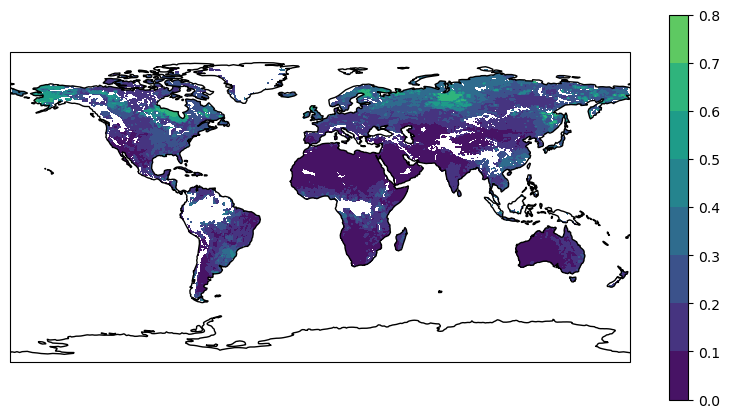

In [3]:
# Create a map with PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the m_min data as a color mesh
mesh = ax.contourf(lon, lat, m_mean_pentad_min, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=1.0)

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(mesh)

# Show the plot
plt.show()

In [4]:
import numpy as np
import os

In [5]:
import matplotlib.pyplot as plt

In [6]:
from mapper_functions import plot_global
from mapper_functions import plot_na

In [7]:
from my_functions import read_obsfcstana

In [8]:
path = '/discover/nobackup/amfox/Experiments/ASCAT_test_metop_sm_branch/ASCAT_test_metop_sm_branch/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'ASCAT_test_metop_sm_branch.ens_avg.ldas_ObsFcstAna.2015040'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  77339


In [9]:
path = '/discover/nobackup/amfox/Experiments/ASCAT_test_metop_sm_AD/ASCAT_test_metop_sm_AD/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'ASCAT_test_metop_sm_AD.ens_avg.ldas_ObsFcstAna.2015040'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  77334


In [10]:
path = '/discover/nobackup/amfox/Experiments/ASCAT_test_metop_sm_AD_setup/ASCAT_test_metop_sm_AD/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'ASCAT_test_metop_sm_AD.ens_avg.ldas_ObsFcstAna.2015040'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  77334


In [11]:
((77339-77401)/77339)*100 77836 76944 77588 78023

SyntaxError: invalid syntax (1386110179.py, line 1)

In [ ]:
numobs = len(obs_tilenum)
print("Number of ASCAT obs:", numobs)

unique_values = np.unique(obs_tilenum)
num_unique_values = len(unique_values)
print("Number of unique ASCAT tiles:", num_unique_values)

In [ ]:
omf = obs_obs - obs_fcst
oma = obs_obs - obs_ana

In [ ]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf, density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf), np.std(omf)))
n2, bins, patches = plt.hist(oma, density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma), np.std(oma)))

plt.title('Obs space diagnostics, UpT02, ASCAT observations, 040115')

plt.legend()

In [ ]:
np.min(obs_obs)

In [ ]:
bin_edges = np.linspace(-0.15, 0.6, 51)
n1, bins, patches = plt.hist(obs_obs, density=False, bins=bin_edges, alpha=0.4,label='Obs ({:.3f}/{:.3f})'.format(np.mean(omf), np.std(omf)))

In [ ]:
num_negative_values = np.sum(obs_obs < 0)

print("Number of negative values:", num_negative_values)

In [ ]:
2276/77248

In [ ]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.05, 1.0, 51)
n2, bins, patches = plt.hist(obs_fcst[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='Fcst ({:.3f}/{:.3f})'.format(np.mean(obs_fcst[ascat_obs]), np.std(obs_fcst[ascat_obs])))
n1, bins, patches = plt.hist(obs_obs[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='Obs ({:.3f}/{:.3f})'.format(np.mean(obs_obs[ascat_obs]), np.std(obs_obs[ascat_obs])))
#n3, bins, patches = plt.hist(obs_obs_no_scaling[ascat_obs_no_scaling], density=False, bins=bin_edges, alpha=0.9, label='ASCAT ({:.3f}/{:.3f})'.format(np.mean(obs_obs_no_scaling[ascat_obs_no_scaling]), np.std(obs_obs_no_scaling[ascat_obs_no_scaling])), histtype='step')



plt.title('Bias correction, ASCAT observations, 040115')

plt.legend()

In [ ]:
numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]
oma_a = oma[ascat_obs]
test = oma_a>0.2
oma_a[test] = 0.2
test = oma_a<-0.2
oma_a[test] = -0.2

obarray[:, 0] = oma_a

plot_global(obarray,False,'ASCAT OmA, Upt02, 040115','Wetness')


In [ ]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_ana[smap_obs] - obs_fcst[smap_obs]

plot_global(obarray,False,'SMAP AmF, 040115','Tb')
plot_na(obarray,False,'SMAP AmF, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]
obarray[:, 0] = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

In [ ]:
plot_global(obarray,False,'ASCAT AmF, 040115','Wetness')

In [ ]:
plot_na(obarray,False,'ASCAT AmF, 040115','Wetness')

UpT02_amf_smap = obs_ana[smap_obs] - obs_fcst[smap_obs]
UpT02_amf_ascat = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

In [ ]:
path = '/discover/nobackup/amfox/Experiments/UpT13_multivar_test/UpT13_multivar_test/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
file_name_start = 'UpT13_multivar_test.ens_avg.ldas_ObsFcstAna.20150401'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

In [ ]:
smap_obs = (obs_species < 5)
ascat_obs = (obs_species > 4)

numobs = len(obs_tilenum[smap_obs])
print("Number of SMAP obs:", numobs)

unique_values = np.unique(obs_tilenum[smap_obs])
num_unique_values = len(unique_values)
print("Number of unique SMAP tiles:", num_unique_values)

numobs = len(obs_tilenum[ascat_obs])
print("Number of ASCAT obs:", numobs)

unique_values = np.unique(obs_tilenum[ascat_obs])
num_unique_values = len(unique_values)
print("Number of unique ASCAT tiles:", num_unique_values)

numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_obs[smap_obs]

plot_global(obarray,False,'SMAP observations, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

obs_gt_zero = obs_obs
test = obs_obs<0
obs_gt_zero[test] = 0.0

obarray[:, 0] = obs_gt_zero[ascat_obs]

plot_global(obarray,False,'ASCAT observations, 040115','Wetness')

In [ ]:
#test = obs_ana<-1000
#obs_ana[test] = 250.0

omf = (obs_obs - obs_fcst)
oma = (obs_obs - obs_ana)

bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[smap_obs]), np.std(omf[smap_obs])))
n2, bins, patches = plt.hist(oma[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[smap_obs]), np.std(oma[smap_obs])))

plt.title('Obs space diagnostics, UpT13, SMAP observations, 040115')

plt.legend()

In [ ]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(omf[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(omf[ascat_obs]), np.std(omf[ascat_obs])))
n2, bins, patches = plt.hist(oma[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(oma[ascat_obs]), np.std(oma[ascat_obs])))

plt.title('Obs space diagnostics, UpT13, ASCAT observations, 040115')

plt.legend()

In [ ]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = omf[smap_obs]

plot_global(obarray,False,'UpT13 SMAP OmF, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

omf_a = omf[ascat_obs]
test = omf_a>0.3
omf_a[test] = 0.3
test = omf_a<-0.3
omf_a[test] = -0.3

obarray[:, 0] = omf_a

plot_global(obarray,False,'UpT13 ASCAT OmF, 040115','Wetness')

In [ ]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = oma[smap_obs]

plot_global(obarray,False,'UpT13 SMAP OmA, 040115','Tb')

numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]

oma_a = oma[ascat_obs]
test = oma_a>0.5
oma_a[test] = 0.5
test = oma_a<-0.5
oma_a[test] = -0.5

obarray[:, 0] = oma_a

plot_global(obarray,False,'UpT13 ASCAT OmA, 040115','Wetness')

In [ ]:
numobs = len(obs_species[smap_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[smap_obs]
obarray[:, 2] = obs_lat[smap_obs]
obarray[:, 0] = obs_ana[smap_obs] - obs_fcst[smap_obs]

plot_global(obarray,False,'UpT13 SMAP AmF, 040115','Tb')

In [ ]:
plot_na(obarray,False,'UpT13 SMAP AmF, 040115','Tb')

In [ ]:
numobs = len(obs_species[ascat_obs])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[ascat_obs]
obarray[:, 2] = obs_lat[ascat_obs]
obarray[:, 0] = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

plot_global(obarray,False,'UpT13 ASCAT AmF, 040115','Wetness')

In [ ]:
plot_na(obarray,False,'UpT13 ASCAT AmF, 040115','Wetness')

UpT13_amf_smap = obs_ana[smap_obs] - obs_fcst[smap_obs]
UpT13_amf_ascat = obs_ana[ascat_obs] - obs_fcst[ascat_obs]

In [ ]:
# ASCAT
# bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(UpT02_amf_ascat, density=False, bins=bin_edges, alpha=0.4,label='UpT02 ({:.3f}/{:.3f})'.format(np.mean(UpT02_amf_ascat), np.std(UpT02_amf_ascat)))
n2, bins, patches = plt.hist(UpT13_amf_ascat, density=False, bins=bin_edges, alpha=0.4,label='UpT13 ({:.3f}/{:.3f})'.format(np.mean(UpT13_amf_ascat), np.std(UpT13_amf_ascat)))

plt.title('Obs space diagnostics, AmF, ASCAT observations, 040115')

plt.legend()

In [ ]:
# ASCAT
bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(UpT10_amf_smap, density=False, bins=bin_edges, alpha=0.4,label='UpT02 ({:.3f}/{:.3f})'.format(np.mean(UpT10_amf_smap), np.std(UpT10_amf_smap)))
n2, bins, patches = plt.hist(UpT13_amf_smap, density=False, bins=bin_edges, alpha=0.4,label='UpT13 ({:.3f}/{:.3f})'.format(np.mean(UpT13_amf_smap), np.std(UpT13_amf_smap)))

plt.title('Obs space diagnostics, AmF, SMAP observations, 040115')

plt.legend()